# <center> Earthquakes over time dashboard </center>

This notebook demonstrates how developers can quickly build dashboard style apps using Jupyter notebook and ArcGIS API for Python. To run this you need `jupyter-dashboard` installed in your `conda` environment.

In [152]:
#import libraries
from arcgis.gis import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline
from datetime import datetime
from dateutil import parser
from ipykernel.pylab.backend_inline import flush_figures

## Access earthquakes feature layer

<Item title:"earthquakes_2" type:Feature Layer Collection owner:arcgis_python>
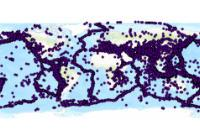

In [13]:
gis = GIS("https://python.playground.esri.com/portal","arcgis_python","amazing_arcgis_123")
eq_item = gis.content.search("title:earthquakes2 & owner:arcgis_python", "feature layer")[0]
eq_item

In [14]:
eq_flayer = eq_item.layers[0]
eq_fset = eq_flayer.query()
eq_df = eq_fset.df
eq_df.head()

,datetime,depth,distance,eventid,gap,latitude,longitude,magnitude,magtype,nbstations,objectid,occurrence_time,rms,source,SHAPE
0,1898/06/29 18:36:00.00,0.0,None,None,None,52.00,172.0,7.6,ML,0.0,1,-2256528240000,None,AK,"{'x': 172, 'y': 52}"
1,1898/10/11 16:37:32.70,0.0,None,None,None,50.71,-179.5,6.9,ML,0.0,2,-2247549747000,None,AK,"{'x': -179.5, 'y': 50.70999999999998}"
2,1899/07/14 13:32:00.00,0.0,None,None,None,60.00,-150.0,7.2,ML,0.0,3,-2223714480000,None,AK,"{'x': -150, 'y': 60}"
3,1899/09/04 00:22:00.00,25.0,None,None,None,60.00,-142.0,8.3,ML,0.0,4,-2219269080000,None,AK,"{'x': -142, 'y': 60}"
4,1899/09/04 04:40:00.00,0.0,None,None,None,60.00,-142.0,6.9,ML,0.0,5,-2219253600000,None,AK,"{'x': -142, 'y': 60}"


In [99]:
eq_df.shape

(77037, 15)

In [5]:
type(eq_df)

arcgis.features._data.geodataset.geodataframe.SpatialDataFrame

#### Parse datetime_ column to Python DateTime obj

In [100]:
eq_df['new_datetime'] = eq_df['datetime'].apply(lambda x: parser.parse(x))

In [28]:
# eq_df.to_csv('earthquakes_newdt.csv')

### Plot the number and intensity of hurricanes over time

In [101]:
eq_years = eq_df['new_datetime'].apply(lambda x : x.year)
eq_df['years'] = eq_years

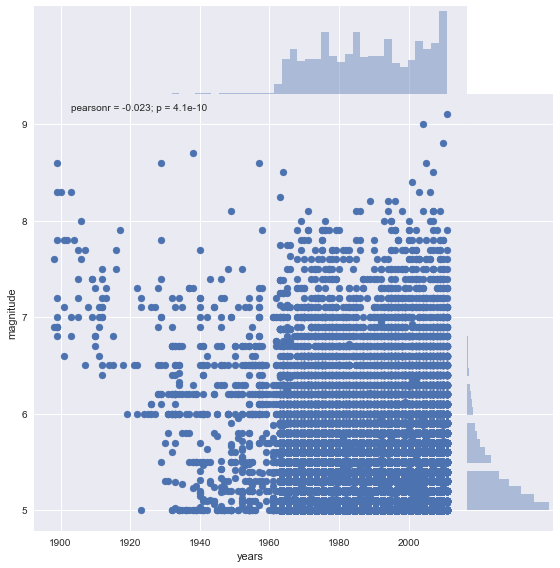

In [51]:
g1 = sns.jointplot(eq_years, eq_df['magnitude'], size=8, space=0)
g1.set_axis_labels(xlabel='years', ylabel='magnitude')
g1

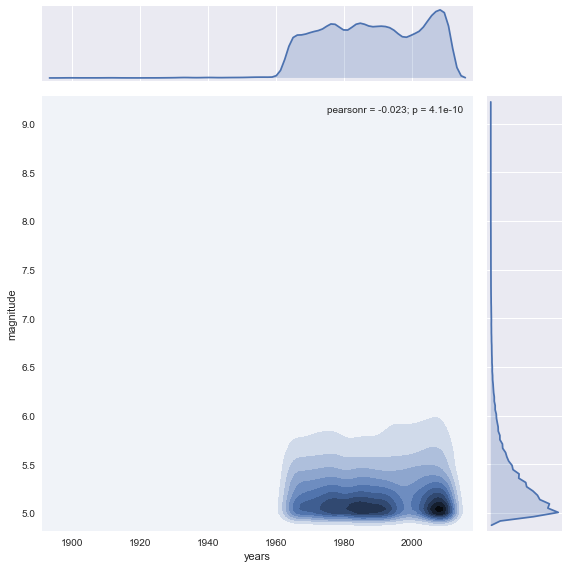

In [50]:
g2 = sns.jointplot(eq_years, eq_df['magnitude'], kind='kde', size=8)
g2.set_axis_labels(xlabel='years', ylabel= 'magnitude')
g2

## Get finer picture

In [73]:
from ipywidgets import widgets, interact, Layout

In [83]:
lyt=Layout(width='100%')
w2 = widgets.IntRangeSlider(
    value=[1980, 1990],
    min=1900,
    max=2010,
    step=1,
    description='Intervals',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    width='800px',
    layout = lyt
)

## Throw in the map

In [93]:
map1 = gis.map()
map1

In [95]:
map1.add_layer(eq_item.layers[0], {'renderer':'ClassedSizeRenderer',
                                   'field_name':'magnitude',
                                   'opacity':0.5})

In [131]:
def update_map(x):
    start_time = str('1/1/{} UTC'.format(x[0]))
    end_time = str('1/1//{} UTC'.format(x[1]))
    map1.set_time_extent(start_time, end_time)
    
    filtered_df = eq_df[(eq_df['years']>=x[0]) & (eq_df['years']<=x[1])]
    g3 = sns.jointplot(filtered_df['years'], filtered_df['magnitude'], size=6)
    g3.set_axis_labels(xlabel='years', ylabel= 'magnitude')
    g3

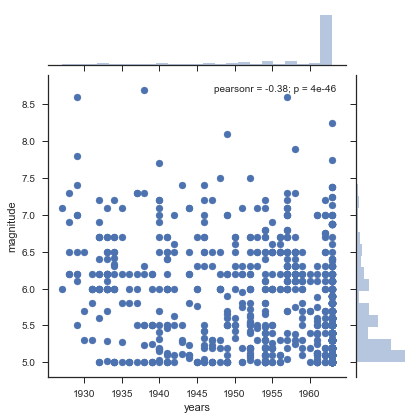

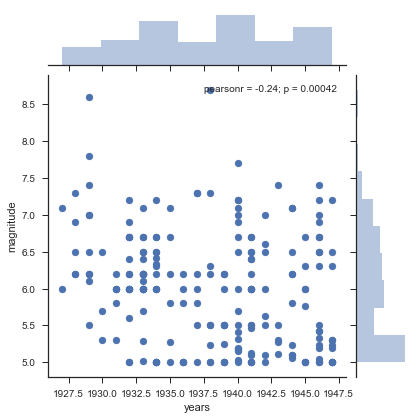

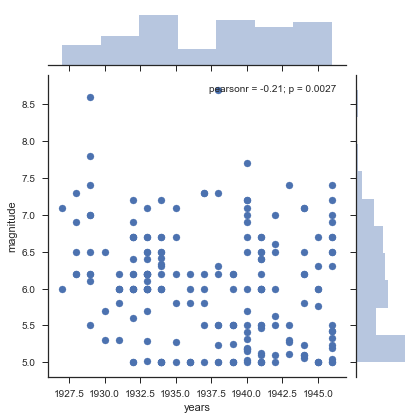

In [132]:
interact(update_map, x=w2);

### Histograms to update

In [109]:
filtered_df = eq_df[(eq_df['years']>=w2.value[0]) & (eq_df['years']<=w2.value[1])]

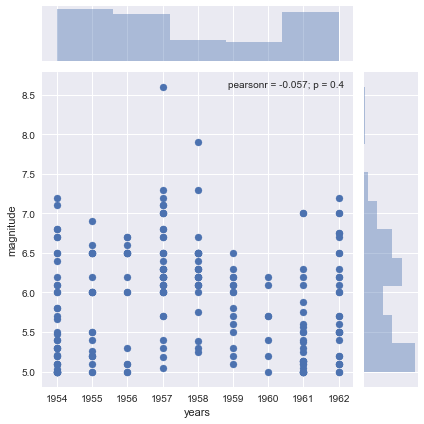

In [111]:
g3 = sns.jointplot(filtered_df['years'], filtered_df['magnitude'], size=6)
g3.set_axis_labels(xlabel='years', ylabel= 'magnitude')
g3

In [133]:
map2 = gis.map()
map2.add_layer(eq_item.layers[0], {'renderer':'ClassedSizeRenderer',
                                   'field_name':'magnitude',
                                   'opacity':0.5})

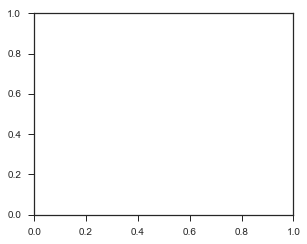

In [153]:
fig = plt.figure()
ax = fig.add_axes([0,0,0.6,0.7]) #rectangle's [left, bottom, width, height]

In [140]:
map2

In [165]:
fig = plt.figure()

In [168]:
def update_map2(x):
    start_time = str('1/1/{} UTC'.format(x[0]))
    end_time = str('1/1//{} UTC'.format(x[1]))
    map2.set_time_extent(start_time, end_time)
    
    filtered_df = eq_df[(eq_df['years']>=x[0]) & (eq_df['years']<=x[1])]
    fig = plt.figure()
    fig.clear()
    ax = fig.add_axes([0,0,0.6,0.7]) #rectangle's [left, bottom, width, height]
    ax.scatter(filtered_df['years'],filtered_df['magnitude'])
    ax.set_xlabel('years')
    ax.set_ylabel('magnitude')
    fig.canvas.draw()

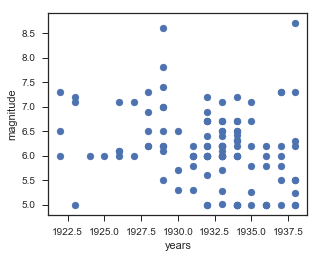

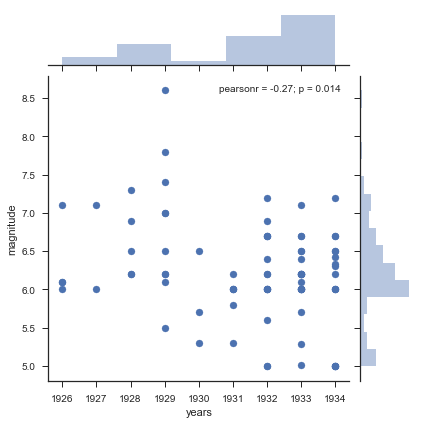

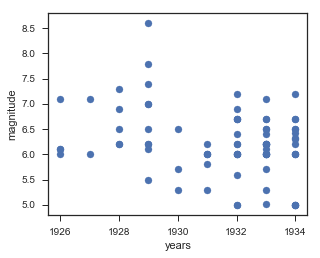

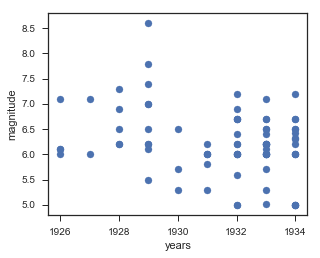

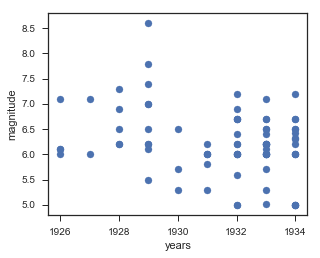

In [169]:
interact(update_map2, x=w2);

In [156]:
ax.plot(filtered_df['years'],filtered_df['magnitude'])

In [158]:
ax.clear()